In [1]:
import numpy as np
import matplotlib.pyplot as plt

import modulation
import noise

In [2]:
def plot(y):
    plt.figure(figsize=(15, 6))
    plt.plot(y)
    plt.show()

In [3]:
def plot_spectrogram(wave, modulator):
    spectrogram, sample_freqs = modulator.wave_to_spectrogram(wave, cut_f=False, return_f=True)
    plt.figure(figsize=(15, 6))
    plt.pcolormesh(np.arange(spectrogram.shape[-1]), sample_freqs, spectrogram)
    plt.show()

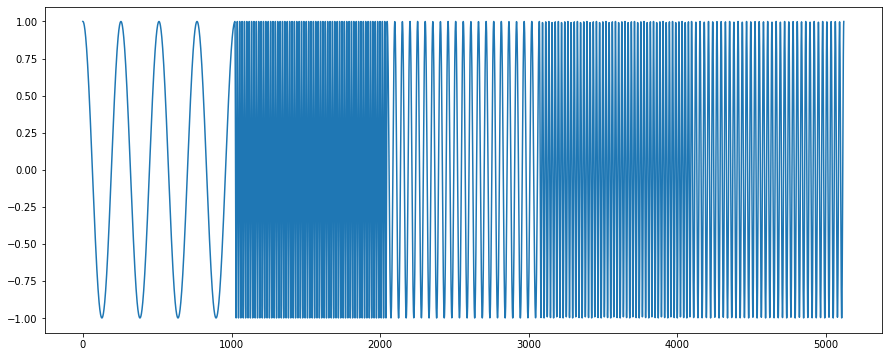

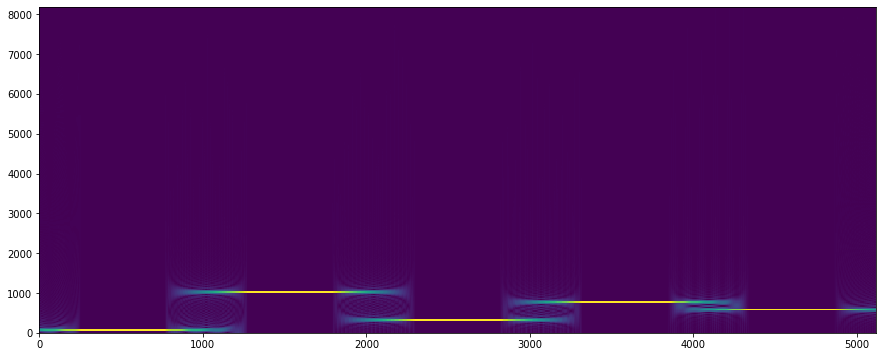

In [4]:
modulator = modulation.Modulator(min_freq=0, max_freq=1024)
data = np.array([0, 15, 4, 11, 8])
wave = modulator.modulate(data)
plot(wave)
plot_spectrogram(wave, modulator)

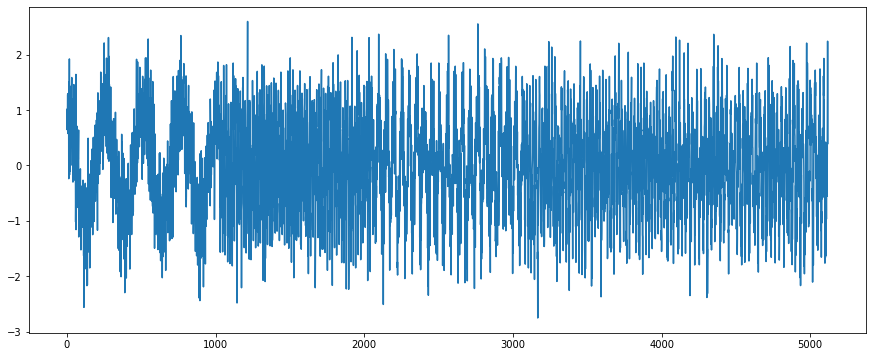

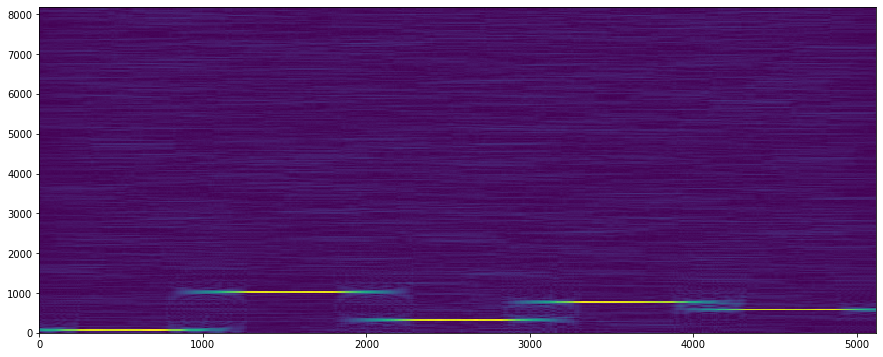

In [5]:
noise_wave = noise.gen_white_gaussian_noise(len(wave))
noisy_wave = noise.add_noise(wave, 1, noise_wave)
plot(noisy_wave)
plot_spectrogram(noisy_wave, modulator)

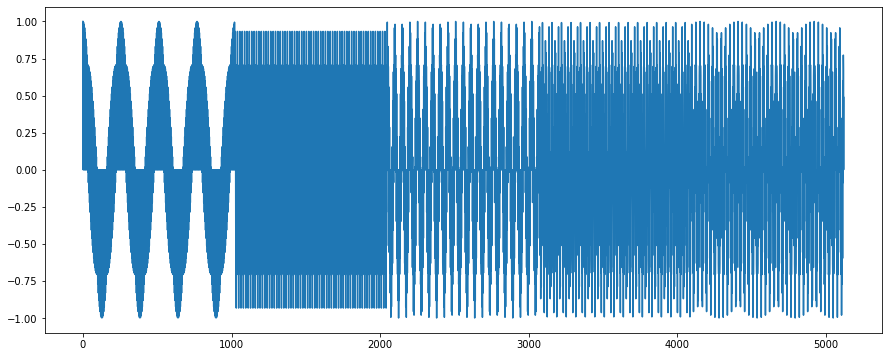

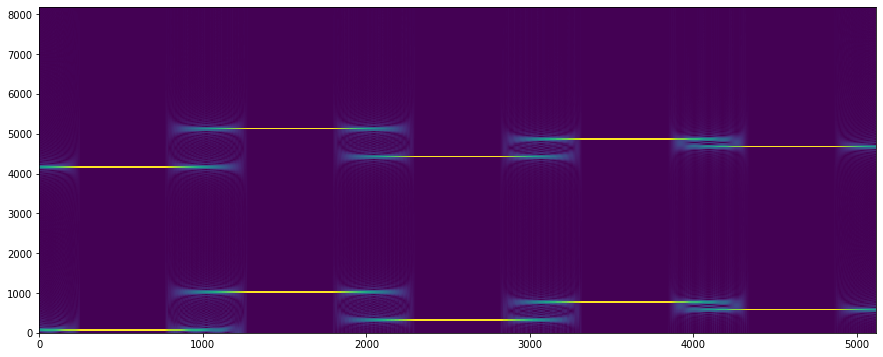

In [6]:
hf_modulator = modulation.Modulator()
f_corrector = modulation.FrequencyCorrector()

hf_wave = hf_modulator.modulate(data)
adj_wave = f_corrector.move_frequencies(hf_wave, False)

plot(adj_wave)
plot_spectrogram(adj_wave, hf_modulator)

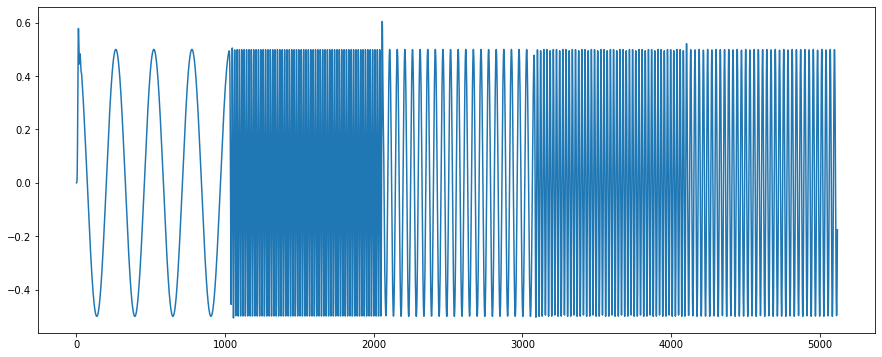

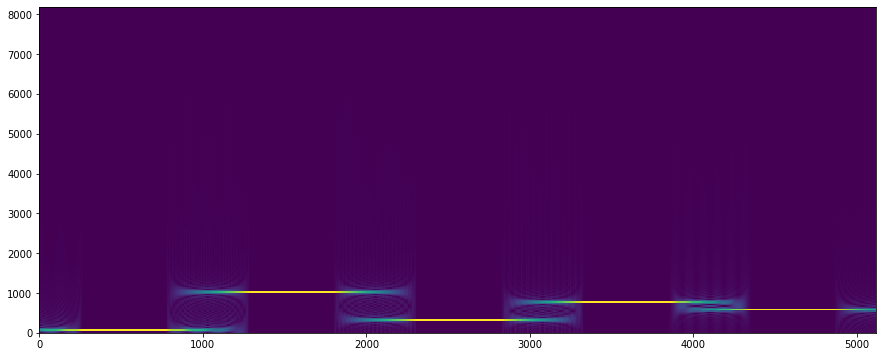

In [7]:
filt_wave = f_corrector.move_frequencies(hf_wave)
plot(filt_wave)
plot_spectrogram(filt_wave, hf_modulator)